In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickle
from collections import deque
import pandas as pd

import pickle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [4]:
import os
import subprocess

if not os.path.exists('potts_temp_multi.pkl'):
    subprocess.run(['python', 'parallel_simulation.py'])

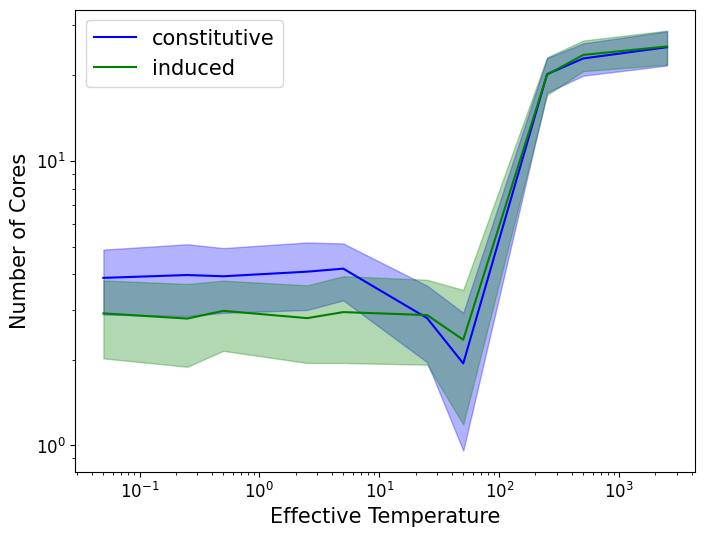

In [5]:
filename = 'potts_temp_multi'

def load_df(filename):
    with open(f'{filename}.pkl','rb') as f:
        loaded = pickle.load(f)
        return loaded['df']
df = load_df(filename)

# Function to plot mean and std values for each experiment
def plot_experiment_results(results_df):
    # Group data by experiment and temperature
    grouped = results_df.groupby(['experiment', 'T'])
    
    # Calculate mean and std for each group
    summary = grouped['n_cores'].agg(['mean', 'std']).reset_index()

    # Plot the results
    fig, ax = plt.subplots(figsize=(8, 6))
    experiments = results_df['experiment'].unique()
    experiments = ['constitutive','induced']
    colors = ['blue', 'green']  # Assign colors for the experiments

    for i, experiment in enumerate(experiments):
        exp_data = summary[summary['experiment'] == experiment]
        T = exp_data['T']
        mean = exp_data['mean']
        std = exp_data['std']
        
        ax.plot(T, mean, label=experiment, color=colors[i])
        ax.fill_between(T, mean - std, mean + std, color=colors[i], alpha=0.3)

    ax.set_xscale('log')  # Set x-axis to logarithmic scale if needed
    ax.set_yscale('log')  # Set x-axis to logarithmic scale if needed
    ax.set_xlabel("Effective Temperature",fontsize=15)
    ax.set_ylabel("Number of Cores",fontsize=15)    
    ax.legend(fontsize=15)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    # ax.set_title("Number of Cores")
    plt.show()

# Example call to the function (assuming `results_df` is already defined)
plot_experiment_results(df)
